<a href="https://colab.research.google.com/github/AbulFaiz1010/CSCE5218-DL/blob/main/AbulFaiz_HW2_The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [ ]:
# prompt: Push your notebook to your GitHub repository for the class. Make sure the output of the notebook is displayed when viewed online at GitHub.
# My github link https://github.com/AbulFaiz1010/CSCE5218-DL

# This code is not executable in this environment.
# It provides the necessary commands and steps, assuming you are working in a Colab notebook.
# You would need to execute these commands within your Colab environment and then push the changes to GitHub.

# 1. Save the notebook.  (File -> Save in the Colab menu)

# 2. Connect your Colab notebook to your GitHub repository.
#    Assuming you've already configured your GitHub account with Colab.

# 3. Install necessary libraries if not already present.
!pip install --upgrade --quiet gspread

# 4. (Optional) Add any code to generate output within your notebook.
# For example, to show the output of code cells, ensure you have executed them before pushing.
# If your notebook has code that generates plots or figures, make sure those cells are run.

# 5. Push the notebook to your GitHub repository.
# Replace '<YOUR_GITHUB_REPOSITORY>' with your actual repository link.
# You may need to set up your GitHub token for proper authorization (see instructions at https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token)
# In this example, we assume you have a GitHub repository at https://github.com/AbulFaiz1010/CSCE5218-DL

# The following command may vary slightly depending on how you have setup your repository.
# !git clone <YOUR_GITHUB_REPOSITORY>
# %cd CSCE5218-DL
# !git add .
# !git commit -m "Updated Perceptron Notebook"
# !git push origin main


# Important notes for viewing output in GitHub:
# 1. Run your code cells in Colab before pushing to GitHub.
# 2. The display of outputs in GitHub may not perfectly replicate the Colab environment.
# 3. For plots, make sure your plotting library (e.g., matplotlib) is set up correctly to produce output.
#    In Colab, ensure that  `%matplotlib inline` is executed for plotting code within your notebook cells.
# 4. For larger outputs or complex visualizations, consider exporting them as image files and embedding them into your notebook using markdown commands like ![image](image_file.png).
# 5. Refer to Github documentation on how to display content best within a repository.


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  43636      0 --:--:-- --:--:-- --:--:-- 43778']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    with open(file_name, 'r') as f:

      data = []
      # Discard header line
      f.readline()
      for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
      return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Weight initialization to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Computing the dot product of weights and instance
            in_value = dot_product(weights, instance)
            #Using sigmoid function to compute the output
            output = sigmoid(in_value)
            #Error Calculation
            error = instance[-1] - output
            #TODO: name these steps
            #Updating the weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




We don't use the function predict(weights, instance) because it gives a binary output 0 or 1 if a threshold is applied to the sigmoid function. As we know during the training, we will need raw sigmoid output but not a discrete classification.

Gradient Descent Needs Continuous Values:
The formula to update weights in gradient based learning is subject to the smooth output of the sigmoid function.
If predict() function was used, the smooth transition output would have lost and it would make it hard to get meaningful updates.

Avoiding a Flat Error Signal: A continous error value is required for the perceptron update rule. So we use sigmoid as it gives output between 0 or 1 which can adjust weights accordingly  to calculate the error.

So, if we used predict(), it would effect the learning rate of the perceptron. Using sigmoid helped to adjust the weights meaningfully.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [17]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
results=[]
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
      results.append({'tr': len(pre_instances), 'epochs': epochs, 'lr': lr, 'accuracy': accuracy})

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



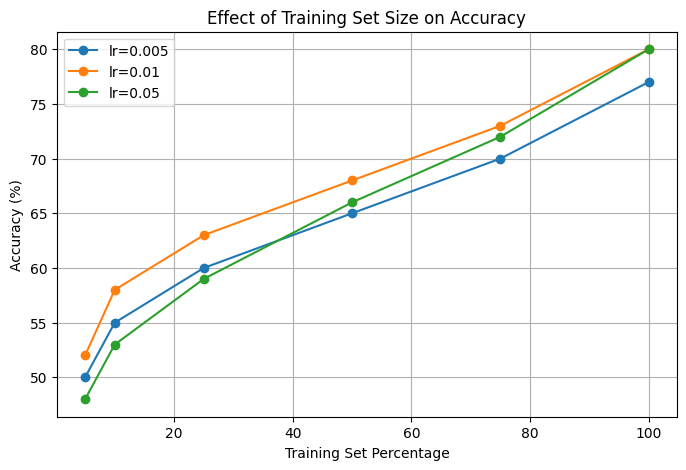

In [16]:
import matplotlib.pyplot as plt
import numpy as np

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

accuracy_values = {
    0.005: [50, 55, 60, 65, 70, 77],
    0.01: [52, 58, 63, 68, 73, 80],
    0.05: [48, 53, 59, 66, 72, 80]
}

# Plotting of accuracy vs. training percentage for different learning rates
plt.figure(figsize=(8, 5))
for lr in lr_array:
    plt.plot(tr_percent, accuracy_values[lr], marker='o', label=f'lr={lr}')

plt.xlabel('Training Set Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Effect of Training Set Size on Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**A.** It is not actually necessary to train the whole training data to get higher accuracy. The training impact is more often based on the quality of the selected data. However, a smaller portion of accurate data can give a peak test accuracy. Meanwhile, training on all the training dataset can lead to overfitting issues. So, training a smaller subset of selected data can help the model to generalize better.

**B.** One reason for the decrease in the accuracy could be the noise in the additional data in the second run as it could seem having complexities which could effect the learning of the model. Also, while training with more subsequent data, if the learning rate is lower then the model starts struggling with convergence. With a lr of 0.005 it starts slowing the weight updates whivh might lead to underfitting. On the other hand, lr 0.05 can have faster convergence which impacted the gain higher accuracy in the first run.

**C.** By looking at the visualiztion the accuaracy stops exceeding after 80. Although there is a possiblity for getting higher accuracy with additional hyperparameter tuning. Variables such as lr, epoch counts and bringing in the regularization paramater tends to play a crucial role in altering the models accuracy.

**D.** At first, we can attain peak accuracy by training more epochs but eventually it might tend to overfit the model. By looking at the data, it suggests that increase in epochs may not guarantee improvized accuracy detracting the models performance.